<a href="https://colab.research.google.com/github/LeticiaHeeren/DIO-desafio-rede-YOLO/blob/main/rede_yolo_carros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()  # Faça upload do arquivo `kaggle.json`

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"letciaheeren","key":"7180e6ba9aa93576382179b19da6c633"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d abdallahwagih/cars-detection

Dataset URL: https://www.kaggle.com/datasets/abdallahwagih/cars-detection
License(s): apache-2.0
 92% 35.0M/38.2M [00:02<00:00, 21.0MB/s]
100% 38.2M/38.2M [00:02<00:00, 13.4MB/s]


In [5]:
!unzip -q cars-detection.zip -d ./cars-detection

In [8]:
!pip install ultralytics
from ultralytics import YOLO
import cv2
import torch
import matplotlib.pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [9]:
model = YOLO("yolov8n.pt")  # Ou "yolov8s.pt" para um modelo maior


100%|██████████| 6.25M/6.25M [00:00<00:00, 114MB/s]


In [41]:
image_path = "/content/cars-detection/Cars Detection/train/images/13ea89974fc5e30b_jpg.rf.5f030335718610642432bb4f65e23b74.jpg"
results = model(image_path)


image 1/1 /content/cars-detection/Cars Detection/train/images/13ea89974fc5e30b_jpg.rf.5f030335718610642432bb4f65e23b74.jpg: 640x640 2 cars, 2 trucks, 21.4ms
Speed: 5.0ms preprocess, 21.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


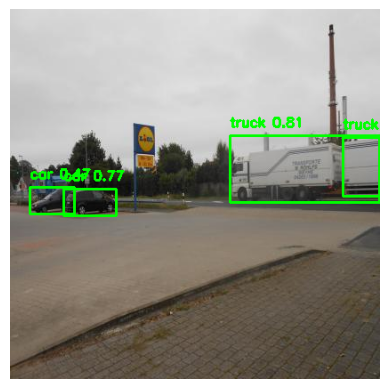

In [42]:
# Carregar imagem original
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Desenhar detecções
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Coordenadas da bounding box
        conf = box.conf[0]  # Confiança
        cls = int(box.cls[0])  # Classe detectada
        label = f"{model.names[cls]} {conf:.2f}"  # Nome + confiança

        # Desenhar retângulo e texto na imagem
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Mostrar imagem com detecções
plt.imshow(img)
plt.axis("off")
plt.show()
